<p style="align: center;"><img align=center src="https://mailfit.com/wp-content/uploads/2019/11/lego-5.png"  width=900></p>
<h1 style="text-align: center;"><b>«Практика № 5 - Продвинутые инструменты для работы с ненормальным распределением
»</b></h3>


# Вспомним теорию - ЦПТ

<div class="alert alert-info">
    
Пусть есть бесконечная последовательность независимых одинаково распределенных случайных величин с конечным математическим ожиданием и дисперсией. Тогда:

<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS5j9TYiUJzCjPsfT7_zXuWwmA3Fyg8vaf_JA&usqp=CAU'>

# Бустрап

<p style="align: center;">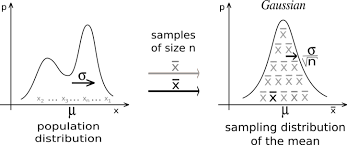</p>


# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое памяти одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

# Данные A/B тестирования

In [1]:
import pandas as pd # Для удобной работы с таблицами 
import numpy as np

from scipy import stats # При работе со статистикой

In [5]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'

data = pd.read_csv(pokemon_path, on_bad_lines='skip')  # Откроем датасет
data.head()

# Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
# что они имеют одинаковую значимость

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


In [14]:
# Сгруппируем информацию по классу
# data.groupby('Class 1').mean() # govno ne rabochaya
data.groupby('Class 1').mean(numeric_only=True)

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
Class 1,,,,,,,,
Bug,369.072464,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,0.000000
Dark,508.387097,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,0.064516
Dragon,522.843750,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,0.375000
Electric,401.590909,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,0.090909
Fairy,495.529412,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,0.058824
Fighting,401.444444,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,0.000000
Fire,361.942308,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,0.096154
Flying,747.500000,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,0.500000
Ghost,537.281250,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,0.062500


In [15]:
# Сгруппируем по классам и посчитаем количество в каждом классе, чтоб определеить самые представленные
data['Class 1'].value_counts()

Class 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

# Задача - сравнить два класса покемонов

<div class="alert alert-warning">


Датасет полезный, т.к он комбинирует в себе как численные признаки, так и категориальные!
    
На этом датасете можно проверить множество гипотез. Однако, начнем с того, что проверим, есть ли значимое различие в аттаке (Attack) между двумя классами покемонов **Normal** и **Water**
    
</div>

# Посмотрим на распределения в каждой группе

<div class="alert alert-info">
Гистограмма позволяет зрительно оценить распределение данных. Гистограмма дает информацию о разбросе, средних значениях.
Важно иметь нормальное распределение, чтобы в дальнейшем мы могли их анализировать, для других критериев распределение не имеет значения.
</div>

In [16]:
import matplotlib.pyplot as plt

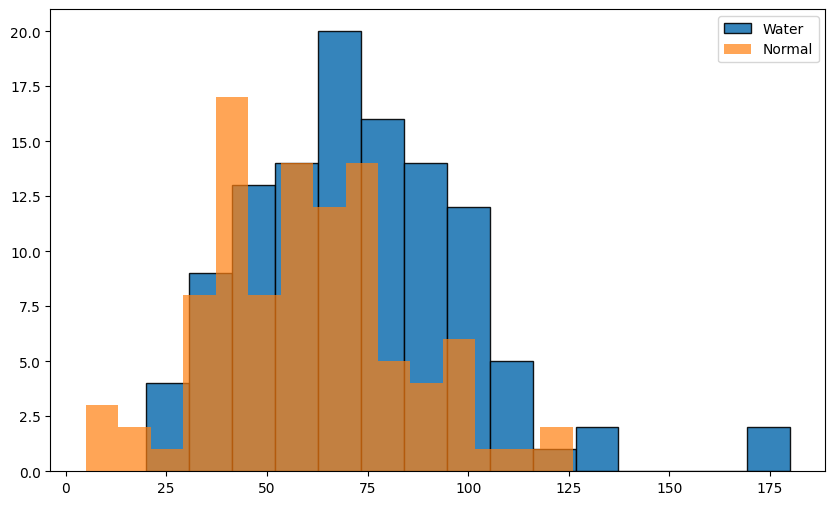

In [18]:
column2compare = 'Defense'

v_1 = data.loc[data["Class 1"] == "Water"]
v_2 = data.loc[data["Class 1"] == "Normal"]

bins = 15
plt.figure(figsize=(10, 6))
plt.hist(v_1[column2compare], bins=bins, alpha=0.9, edgecolor="black", label="Water")
plt.hist(v_2[column2compare], bins=bins, alpha=0.7, label="Normal")
plt.legend(loc="upper right")
plt.show()

<div class="alert alert-info">

Видим, что отличий заметить не удается! Более того, распределение не совсем нормальное

In [19]:
# тест Шапиро!

statistic, p_value = stats.shapiro(data["Attack"])

print("Статистики=%.3f, p=%.3f" % (statistic, p_value))

alpha = 0.05
if p_value > alpha:  # Интерпретируем
    # H_0 = Распределение нормальное
    print("Нормальное распределение (не отвергаем H0)")
else:
    print("Не нормальное распределения (отвергаем H0)")

Статистики=0.979, p=0.000
Не нормальное распределения (отвергаем H0)


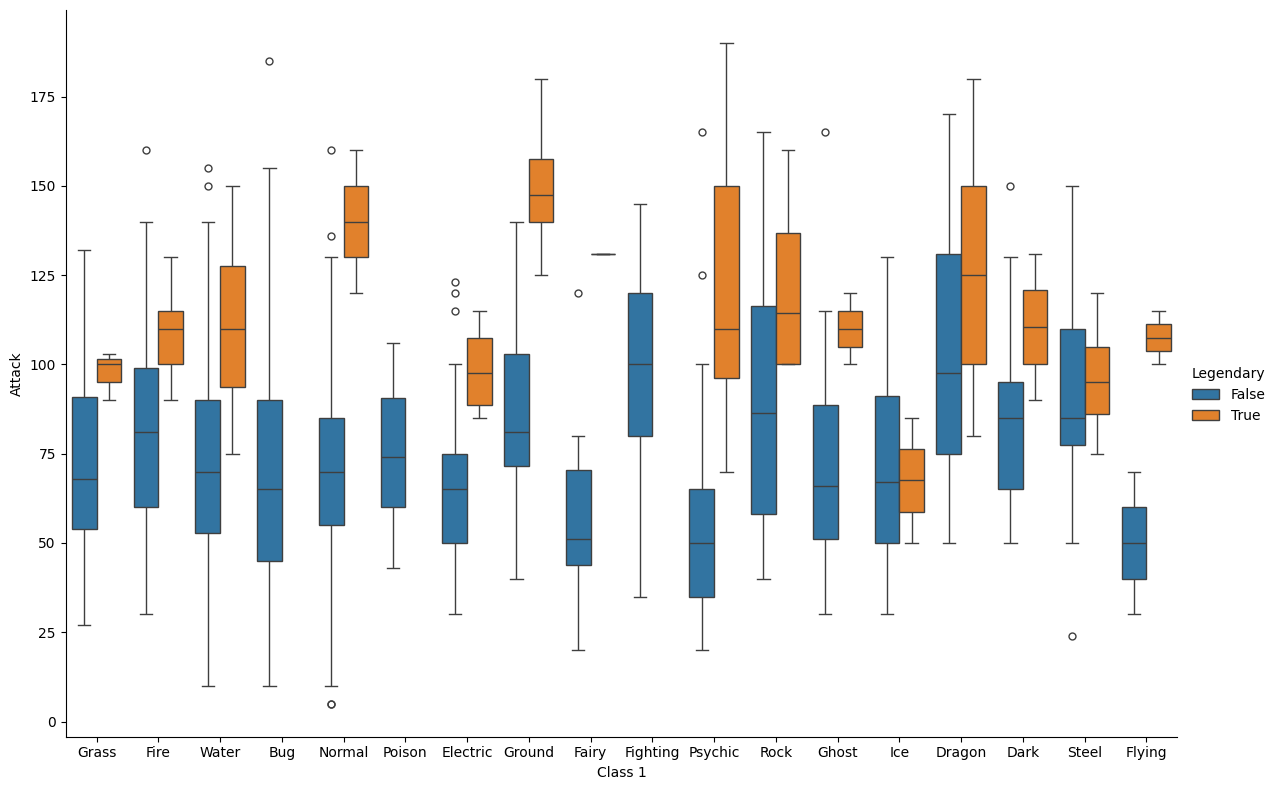

In [22]:
import seaborn as sns


def show_boxplt(data):
    df = data #.loc[data['Attack'] < 170].copy(); #  Можно удилить выбросы при желении

    return sns.catplot(
        x="Class 1",
        y="Attack",
        hue="Legendary",  # col = 'Legendary',
        data=df,
        kind="box",
        height=8,
        aspect=1.5,
    )


show_boxplt(data)

# А что скажут критерии?

In [27]:
t_value, p_value = stats.ttest_ind(v_1["Attack"], v_2["Attack"])

alpha = 0.05
if p_value > alpha:  # Интерпретируем
    print("Одинаковые распределения (не отвергаем H0)")
else:
    print("Разные распределения (отвергаем H0)")

Одинаковые распределения (не отвергаем H0)


In [29]:
t_value, p_value = stats.mannwhitneyu(v_1["Attack"], v_2["Attack"])

alpha = 0.05
if p_value > alpha:  # Интерпретируем
    print("Одинаковые распределения (не отвергаем H0)")
else:
    print("Разные распределения (отвергаем H0)")

Одинаковые распределения (не отвергаем H0)


<div class="alert alert-warning">

Хм, пока не получилось, но мы не будем утчаиваться!!!

In [37]:
#Как получить нормальное распределение в данных? Можно взять логарифм. Но тоже выйдет не очень хорошо в этом случае.
# plt.hist(np.log(v_30['sum_gamerounds']+0.001), bins=15, alpha=1, edgecolor='black', label='gate 30', density=True);
# plt.hist(np.log(v_40['sum_gamerounds']+0.001), bins=15, alpha=1, edgecolor='black', label='gate 40', density=True);

# Будстреп или ЦПТ в деле !!!!

Если вдруг оказалось сложно, то вот еще один способ визуализации различий - будстреп

100%|██████████| 1000/1000 [00:00<00:00, 1625.01it/s]


<Axes: ylabel='Density'>

<Figure size 1200x600 with 0 Axes>

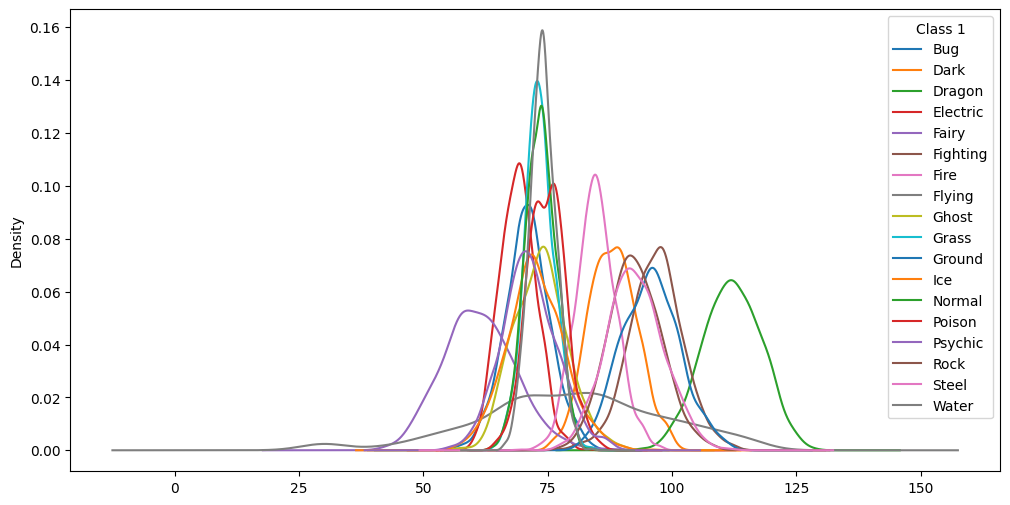

In [40]:
from tqdm import tqdm # для визуализации работы цикла


plt.figure(figsize=(12, 6))

boot_1d = [] # Создаем список получаемых будстапированных значений средних в каждого классе
for i in tqdm(range(1000)):
    boot_mean = (
        data.sample(frac=1, replace=True).groupby("Class 1")["Attack"].mean()
    )  # retention_1
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind="density", figsize=(12, 6))

In [ ]:
# Распределения похожи на нормальные. Классы  между собой отличаются

<Axes: ylabel='Density'>

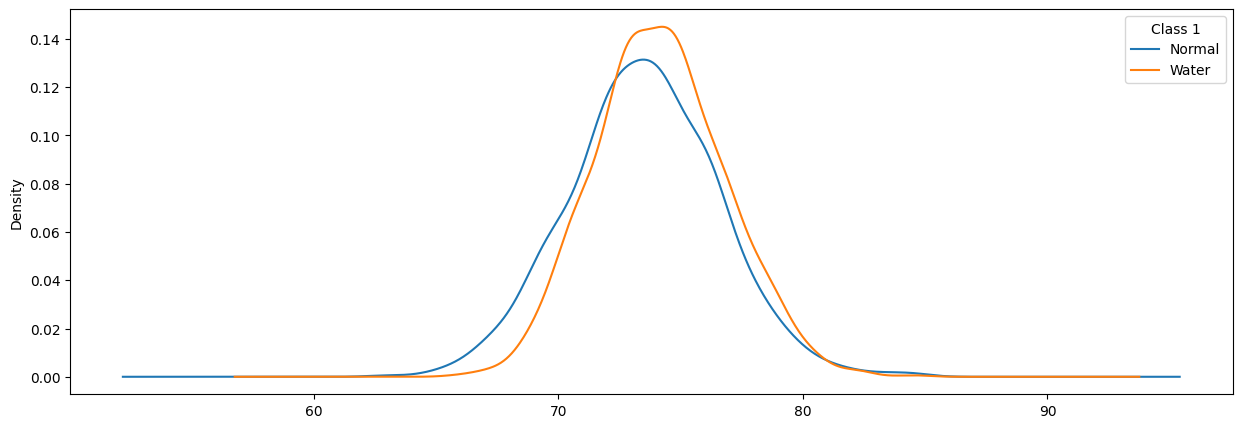

In [35]:
# Для интересующих нас классов Water

boot_1d[["Normal", "Water"]].plot(kind="density", figsize=(15, 5))

<div class="alert alert-success">
    
Отлично. Мы заметили различия невооруженным глазом!
    
Такой способ увеливает чувствительно критериев в разы. Проверим это!
    
Теперь критерий Стьюдента тоже справиться с этой задачей

In [41]:
t_value, p_value = stats.ttest_ind(boot_1d["Normal"], boot_1d["Water"])

alpha = 0.05
if p_value > alpha:  # Интерпретируем
    print("Одинаковые распределения (не отвергаем H0)")
else:
    print("Разные распределения (отвергаем H0)")

Разные распределения (отвергаем H0)


# Больше данных или для чего нужен бакетинг

In [43]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/big_dataset_pokemons.csv'

big_data = pd.read_csv(pokemon_path, on_bad_lines='skip', index_col=0)  # Откроем датасет
print(big_data.shape)
big_data.head()

# Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
# что они имеют одинаковую значимость

(80800, 11)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Jeffrey Bulbasaur,Grass,Poison,79.019577,89.050929,61.907997,65,65,47.282469,False
1,2,Rhonda Ivysaur,Grass,Poison,74.327060,71.218674,153.656004,80,80,119.952001,False
2,3,Caridad Venusaur,Grass,Poison,105.731234,92.745118,97.085080,100,100,90.545777,False
3,4,Tia Mega Venusaur,Grass,Poison,106.003590,132.997223,129.124527,122,120,112.344687,False
4,5,Verdie Charmander,Fire,NaN,39.953682,71.953680,64.682792,60,50,67.003897,False


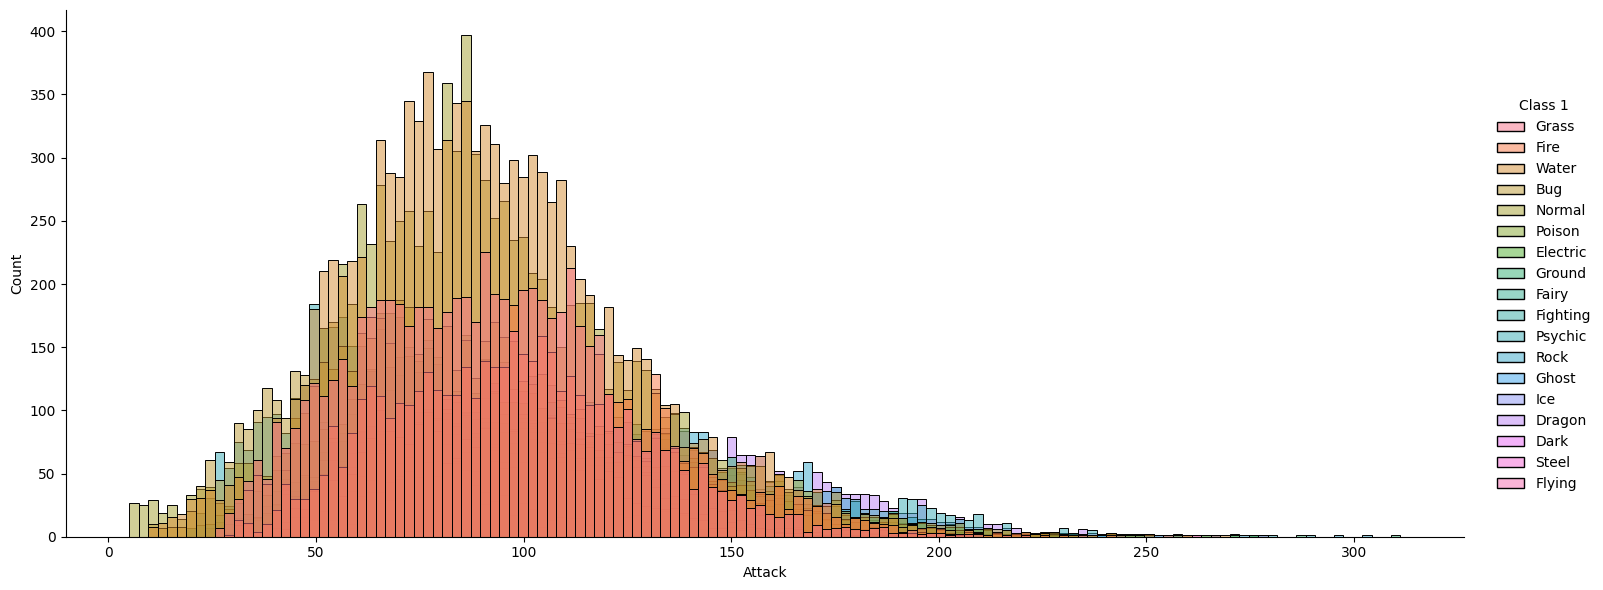

In [44]:
sns.displot(big_data, x='Attack', hue = 'Class 1', alpha=0.5, height = 6, aspect=2.5); 

In [45]:
# Проверим распределение с помощью теста Шапиро!

statistic, p_value = stats.shapiro(big_data["Attack"])
print("Статистики=%.3f, p=%.3f" % (statistic, p_value))

if p_value > 0.05:  # Интерпретируем
    # H_0 = Распределение нормальное
    print("Нормальное распределение (не отвергаем H0)")
else:
    print("Не нормальное распределения (отвергаем H0)")

Статистики=0.980, p=0.000
Не нормальное распределения (отвергаем H0)


C:\Users\siroj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 80800.
  res = hypotest_fun_out(*samples, **kwds)


# Бакетинг VS Будстрап на большем датасете

100%|██████████| 1000/1000 [00:13<00:00, 73.34it/s]


<Axes: ylabel='Density'>

<Figure size 1200x600 with 0 Axes>

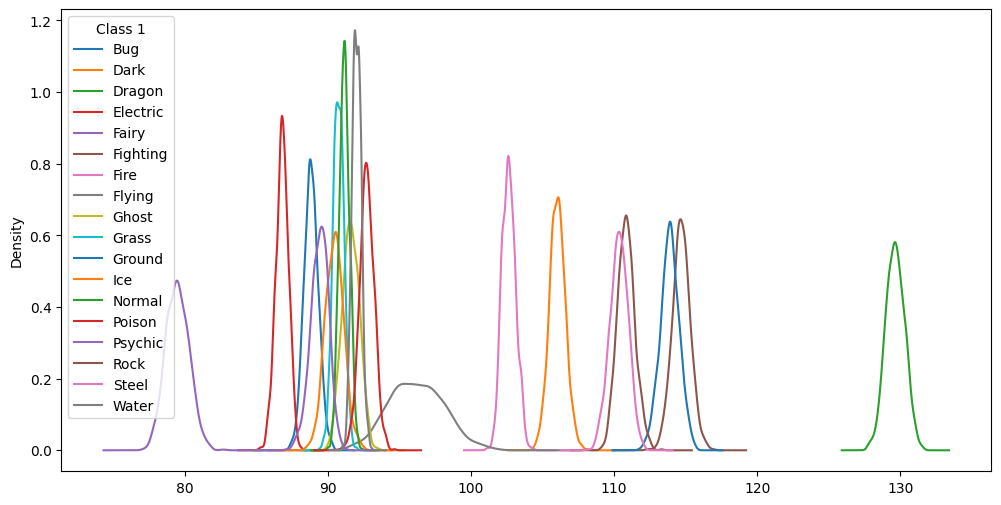

In [47]:
plt.figure(figsize=(12, 6))

boot_1d = [] # Создаем список получаемых будстапированных значений средних в каждого классе
for i in tqdm(range(1000)):
    boot_mean = (
        big_data.sample(frac=1, replace=True).groupby("Class 1")["Attack"].mean()
    )  # retention_1
    boot_1d.append(boot_mean)

# Преобразование списка в DataFrame
boot_1d = pd.DataFrame(boot_1d)

# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind="density", figsize=(12, 6))

In [48]:
# Проверим с помощью теста Шапиро!

statistic, p_value = stats.shapiro(boot_1d["Normal"])
print("Статистики=%.3f, p=%.3f" % (statistic, p_value))

if p_value > 0.05:  # Интерпретируем
    # H_0 = Распределение нормальное
    print("Нормальное распределение (не отвергаем H0)")
else:
    print("Не нормальное распределения (отвергаем H0)")

Статистики=0.999, p=0.655
Нормальное распределение (не отвергаем H0)


<div class="alert alert-success">

Отлично, теперь различить классы стало проще.

<div class="alert alert-warning">

Обратим внимание, что считается ощутимо дольше! А если мы будем считать не среднее, а любую другую метрику, то время может еще сильнее увеличиться. А чем нам ответит бакетинг?

<img src='https://habrastorage.org/r/w1560/webt/cd/1h/x-/cd1hx-k8rgilkmwxafotz3-tgok.png'>


In [49]:
n_bucket = len(big_data) // 200  # Берем бакеты по 250 покемонов
big_data['bucket'] = np.random.randint(1, n_bucket+1, len(big_data)) 

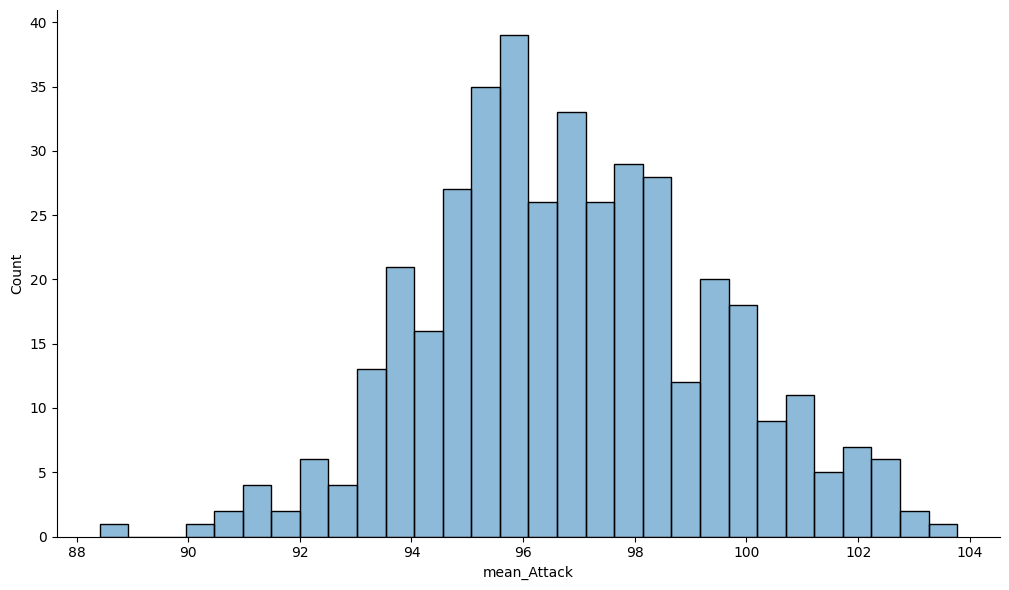

In [50]:
# Считаем среднее внутри каждого бакета
data_grouped= big_data.groupby(['bucket'], as_index=False).agg(mean_Attack=('Attack', 'mean'))
sns.displot(data_grouped, x='mean_Attack', alpha=0.5, height = 6, aspect=1.7, bins=30); 

<div class="alert alert-success">

Моментально отработало!!

In [51]:
# тест Шапиро!

statistic, p_value = stats.shapiro(data_grouped["mean_Attack"])
print("Статистики=%.3f, p=%.3f" % (statistic, p_value))

if p_value > 0.05:  # Интерпретируем
    # H_0 = Распределение нормальное
    print("Нормальное распределение (не отвергаем H0)")
else:
    print("Не нормальное распределения (отвергаем H0)")

Статистики=0.995, p=0.250
Нормальное распределение (не отвергаем H0)


# Выводы

* Будстрап и бакетинг позволяют привести распределение к нормально
* Бакетинг больше подходит для крупных датасетов